## Правила игры



1. Переименовать себя в zoom Имя Фамилия
2. Следующие лабы выполнять в Googgle colab и скидывать ссылку на код
3. Код должен содержать выводы ячеек, которые показывают корректность кода
4. Если не присутствовали на паре, смотреть записи лекций на диске
5. Если возникают проблемы писать в групповой чат



## Что запомнилось с прошлого занятия?

https://audience.ahaslides.com/c89jsr6q2w



## Архитектура систем классификации

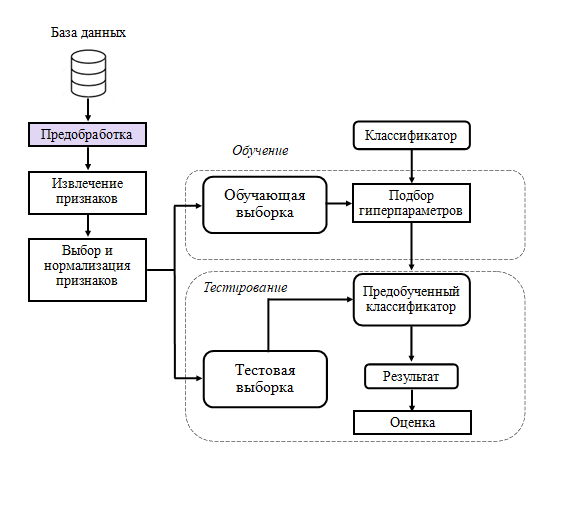

**Предобработка** текстовых данных - это преобразование исходных данных, с целью выделить из них релевантную информацию.

Предобработка текстовых данных состоит из следующих этапов:


*   Удаление пунктуации
*   Приведение всех слов к нижнему регистру
*   Удаление стоп-слов и/или часто встречаемых
*   Токенизация
*   Нормализация (лемматизация и стемминг)







### Выберите правильные утверждения, касаемые предобработки

https://audience.ahaslides.com/c89jsr6q2w

## Токенизация

Токенизация - это разделение текста на значимые единицы

Что может являться значимой единицей для текста?

In [ ]:
#установка библиотеки
#!pip install nltk

In [1]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
#исходные текстовые данные
string = 'В последнее время университет поражает меня количеством мероприятий и конференций, которые организуются для студентов! Всё это развивает, приносит невероятную энергию и новые мысли! БУДЬТЕ АКТИВНЫ! Такое нельзя пропускать!'

In [3]:
#токенизируем текст и записываем в отдельную переменную
tokens = word_tokenize(string)
print(tokens)

['В', 'последнее', 'время', 'университет', 'поражает', 'меня', 'количеством', 'мероприятий', 'и', 'конференций', ',', 'которые', 'организуются', 'для', 'студентов', '!', 'Всё', 'это', 'развивает', ',', 'приносит', 'невероятную', 'энергию', 'и', 'новые', 'мысли', '!', 'БУДЬТЕ', 'АКТИВНЫ', '!', 'Такое', 'нельзя', 'пропускать', '!']


## Удаление пунктуации

In [4]:
from string import punctuation

In [5]:
#записываем в переменную punctuations список существующих пунктуационных знаков
punctuations = list(punctuation)
#print(punctuations)

In [6]:
#удаляем пунктуацию из наших токенов
tokens_without_punct = [i for i in tokens if i not in punctuations]
print(tokens_without_punct)

['В', 'последнее', 'время', 'университет', 'поражает', 'меня', 'количеством', 'мероприятий', 'и', 'конференций', 'которые', 'организуются', 'для', 'студентов', 'Всё', 'это', 'развивает', 'приносит', 'невероятную', 'энергию', 'и', 'новые', 'мысли', 'БУДЬТЕ', 'АКТИВНЫ', 'Такое', 'нельзя', 'пропускать']


### Расположите в правильном порядке строки кода

https://audience.ahaslides.com/c89jsr6q2w

Если мы решаем задачу сентимент-анализа в текстах из соц.сетей какую пунктуацию удалять не нужно?

## Понижение регистра слов

In [7]:
low_tokens = [i.lower() for i in tokens_without_punct]
print(low_tokens)

['в', 'последнее', 'время', 'университет', 'поражает', 'меня', 'количеством', 'мероприятий', 'и', 'конференций', 'которые', 'организуются', 'для', 'студентов', 'всё', 'это', 'развивает', 'приносит', 'невероятную', 'энергию', 'и', 'новые', 'мысли', 'будьте', 'активны', 'такое', 'нельзя', 'пропускать']


## Удаление стоп-слов

Стоп-слова - это слова, не содержащие в себе смысловой нагрузки

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
#записываем в переменную stopwords стоп-слова для русского языка
stopwords = nltk.corpus.stopwords.words('russian')
#print(stopwords)

Все ли слова из этих подходят для задачи сентимент-анализа?

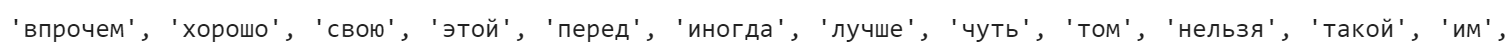

In [10]:
#удаляем стоп-слова из нашего текста
words_without_stop = [i for i in low_tokens if i not in stopwords]
print(words_without_stop)

['последнее', 'время', 'университет', 'поражает', 'количеством', 'мероприятий', 'конференций', 'которые', 'организуются', 'студентов', 'всё', 'это', 'развивает', 'приносит', 'невероятную', 'энергию', 'новые', 'мысли', 'будьте', 'активны', 'такое', 'пропускать']


# Нормализация

Нормализация - приведение всех слов к единой форме.
Нормализация может быть осуществлена двумя методами:


*   Лемматизация
*   Стемминг



### Лемматизация

Лематизация - приведение всех слов к их начальной форме.

In [11]:
!pip install pymorphy2 > None

In [15]:
import pymorphy2

In [16]:
#записываем в morph лемматизатор
morph = pymorphy2.MorphAnalyzer()

In [17]:
#лемматизируем наш получившийся текст
lemms = [morph.parse(i)[0].normal_form for i in words_without_stop]
print(lemms)

['последний', 'время', 'университет', 'поражать', 'количество', 'мероприятие', 'конференция', 'который', 'организоваться', 'студент', 'всё', 'это', 'развивать', 'приносить', 'невероятный', 'энергия', 'новый', 'мысль', 'быть', 'активный', 'такой', 'пропускать']


### Стемминг

Стемминг - выделение основы слова

In [18]:
from nltk.stem.snowball import RussianStemmer

In [19]:
#записываем в stemmer функцию стемминга 
stemmer = RussianStemmer()

In [20]:
#проводим стемминг 
stems = [stemmer.stem(i) for i in words_without_stop]
print(stems)

['последн', 'врем', 'университет', 'поража', 'количеств', 'мероприят', 'конференц', 'котор', 'организ', 'студент', 'все', 'эт', 'развива', 'принос', 'невероятн', 'энерг', 'нов', 'мысл', 'будьт', 'активн', 'так', 'пропуска']


Можно ли применять и лемматизацию и стемминг одновременно (последовательно)? Если да, то в каком порядке?

## Функции в Python

In [21]:
def name_function(argument_1, argument_2):
  sum = argument_1 + argument_2
  return sum

In [22]:
name_function(1, 2)

3

In [23]:
name_function('d', 'a')

'da'

### Необходимо написать функцию, которая на вход получает текст, а на выходе выдает предобработанный текст. Как можно назвать функцию?

https://audience.ahaslides.com/c89jsr6q2w

## Домашнее задание

1. Придумать 2-3 предложения, содержащие знаки препинания, заглавные буквы.
2. Провести предобработку (все пройденные методы из лекции) на тексте из п.1. Вывести результат получившейся предобработки.
3. Загрузить полученный файл из предыдущего домашнего задания.
4. Выполнить предобработку всех текстов. (Может помочь использование цикла и составление собственной функции предобработки).
5. Записать предобработанные тексты в отдельную колонку датафрейма. Предобработанный текст должен быть строкой, а не списком строк. "привет как дел" - правильно, "привет", "как", "дел" - неправильно. 
6. Сохранить полученный датафрейм.

#Пришлите мне в лс в телеграме любой смайлик, кто сдал 1 домашку